In [2]:
#exercise 1
from sklearn.metrics import mean_squared_error

y_true = [91, 51, 2.5, 2, -5]
y_pred = [90, 48, 2, 2, -4]
mse = mean_squared_error(y_true, y_pred)
print(mse)


2.25


In [3]:
#Exercise 2
from sklearn.metrics import accuracy_score
y_pred = [0, 1, 0, 1, 0, 1, 0]
y_true = [0, 0, 1, 1, 1, 1, 0]
print(accuracy_score(y_true, y_pred))

0.5714285714285714


In [5]:
#Exercise 3
# Preliminary code
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

housing = fetch_california_housing()
X, y = housing['data'], housing['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=13)
pipeline = [('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler()), ('lr', LinearRegression())]
pipe = Pipeline(pipeline)
pipe.fit(X_train, y_train)


,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [6]:
# Predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("train prediction:\n", y_train_pred[:10])
print("test prediction:\n", y_test_pred[:10])

train prediction:
 [1.54505951 2.21338527 2.2636205  3.3258957  1.51710076 1.63209319
 2.9265211  0.78080924 1.21968217 0.72656239]
test prediction:
 [ 1.82212706  1.98357668  0.80547979 -0.19259114  1.76072418  3.27855815
  2.12056804  1.96099917  2.38239663  1.21005304]


In [7]:
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Train R2:", r2_train, "Test R2:", r2_test)
print("Train MSE:", mse_train, "Test MSE:", mse_test)
print("Train MAE:", mae_train, "Test MAE:", mae_test)

Train R2: 0.6079874818809448 Test R2: 0.5903435927516574
Train MSE: 0.5210784446797678 Test MSE: 0.5537420654727396
Train MAE: 0.5300159371615256 Test MAE: 0.5454023699809112


In [8]:
#Exercise 4
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=43)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
# Scale test data
X_test_scaled = scaler.transform(X_test)

# Predict classes
y_train_pred = classifier.predict(X_train_scaled)
y_test_pred = classifier.predict(X_test_scaled)
print("train prediction:\n", y_train_pred[:10])
print("test prediction:\n", y_test_pred[:10])


train prediction:
 [1 0 1 1 1 0 0 1 1 0]
test prediction:
 [1 1 0 0 0 1 1 1 0 0]


In [12]:
# Predict probabilities (for AUC)
y_train_proba = classifier.predict_proba(X_train_scaled)[:, 1] 
y_test_proba = classifier.predict_proba(X_test_scaled)[:, 1]


from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Train metrics
f1_train = f1_score(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_proba)

# Test metrics
f1_test = f1_score(y_test, y_test_pred)
acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_proba)

print("Train - F1:", f1_train, "Acc:", acc_train, "Prec:", prec_train, "Rec:", rec_train, "AUC:", auc_train)
print("Test - F1:", f1_test, "Acc:", acc_test, "Prec:", prec_test, "Rec:", rec_test, "AUC:", auc_test)



Train - F1: 0.9911504424778761 Acc: 0.989010989010989 Prec: 0.9893992932862191 Rec: 0.9929078014184397 AUC: 0.998995613495675
Test - F1: 0.9801324503311258 Acc: 0.9736842105263158 Prec: 0.9736842105263158 Rec: 0.9866666666666667 AUC: 0.9863247863247864


In [13]:
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):\n", cm)


Confusion Matrix (Test):
 [[37  2]
 [ 1 74]]


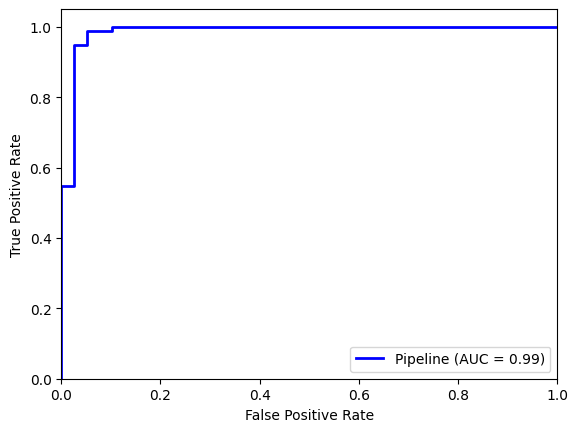

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Pipeline (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [15]:
#Exercise 5
# imports
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR  # SVM for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# data
housing = fetch_california_housing()
X, y = housing['data'], housing['target']

# split data train test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    random_state=43)

# Pipeline 1: Linear Regression
pipe_lr = Pipeline([('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler()),
                    ('model', LinearRegression())])
pipe_lr.fit(X_train, y_train)

# Pipeline 2: SVM
pipe_svm = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', StandardScaler()),
                     ('model', SVR())])  # Default kernel='rbf'
pipe_svm.fit(X_train, y_train)

# Pipeline 3: Decision Tree
pipe_dt = Pipeline([('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler()),
                    ('model', DecisionTreeRegressor(random_state=43))])
pipe_dt.fit(X_train, y_train)

# Pipeline 4: Random Forest
pipe_rf = Pipeline([('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler()),
                    ('model', RandomForestRegressor(random_state=43))])
pipe_rf.fit(X_train, y_train)

# Pipeline 5: Gradient Boosting
pipe_gb = Pipeline([('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler()),
                    ('model', GradientBoostingRegressor(random_state=43))])
pipe_gb.fit(X_train, y_train)



,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [16]:
def evaluate_pipeline(pipe, X_train, y_train, X_test, y_test, name):
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    print(f"{name} - Train r2 score: {r2_train}, MSE: {mse_train}, MAE: {mae_train}")
    print(f"{name} - Test r2 score: {r2_test}, MSE: {mse_test:}, MAE: {mae_test}")
    print()

# Evaluate each
evaluate_pipeline(pipe_lr, X_train, y_train, X_test, y_test, "Linear Regression")
evaluate_pipeline(pipe_svm, X_train, y_train, X_test, y_test, "SVM")
evaluate_pipeline(pipe_dt, X_train, y_train, X_test, y_test, "Decision Tree")
evaluate_pipeline(pipe_rf, X_train, y_train, X_test, y_test, "Random Forest")
evaluate_pipeline(pipe_gb, X_train, y_train, X_test, y_test, "Gradient Boosting")

Linear Regression - Train r2 score: 0.6054131599242077, MSE: 0.5273648371379568, MAE: 0.5330920012614552
Linear Regression - Test r2 score: 0.6128959462132963, MSE: 0.49761195027083804, MAE: 0.5196420310323715

SVM - Train r2 score: 0.7496108582936643, MSE: 0.3346447867133914, MAE: 0.3835645163325985
SVM - Test r2 score: 0.7295080649899692, MSE: 0.3477101776542994, MAE: 0.3897680598426783

Decision Tree - Train r2 score: 1.0, MSE: 9.24499456646287e-32, MAE: 4.221907539810565e-17
Decision Tree - Test r2 score: 0.6228217144931267, MSE: 0.4848526395290697, MAE: 0.4403051356589147

Random Forest - Train r2 score: 0.9741263135396302, MSE: 0.03458015083247723, MAE: 0.12000198560508221
Random Forest - Test r2 score: 0.8119778189909694, MSE: 0.24169750554364758, MAE: 0.3194169859011629

Gradient Boosting - Train r2 score: 0.8042086499063384, MSE: 0.26167490389525294, MAE: 0.3565654303668227
Gradient Boosting - Test r2 score: 0.7895081234643192, MSE: 0.270581700642181, MAE: 0.36455447680396397


In [18]:
#Exercise 6
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


housing = fetch_california_housing()
X, y = housing['data'], housing['target']

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=43)
cv_indices = [(np.arange(18576), np.arange(18576, 20640))]  # Custom CV: train/test split

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv_indices, n_jobs=-1)
grid_search.fit(X, y)



,estimator,RandomForestR...ndom_state=43)
,param_grid,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,"[(array([ 0,...hape=(18576,)), ...)]"
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [19]:
def select_model_verbose(gs):
    best_model = gs.best_estimator_
    best_params = gs.best_params_
    best_score = gs.best_score_
    
    return best_model, best_params, best_score

trained_model, best_params, best_score = select_model_verbose(grid_search)

print("Best Parameters:", best_params)
print("Best CV Score:", best_score)
print("trained model:", trained_model)



Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 200}
Best CV Score: 0.709926822755871
trained model: RandomForestRegressor(min_samples_leaf=4, n_estimators=200, random_state=43)


In [20]:
new_point = np.array([[3.2031, 52., 5.47761194, 1.07960199, 910., 2.26368159, 37.85, -122.26]])
prediction = trained_model.predict(new_point)
print("Prediction for new point:", prediction)

Prediction for new point: [2.46108378]
